In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment

In [3]:
data=pd.read_excel(r'C:\Users\AD15855\OneDrive - Lumen\Desktop\python\iris_.xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Do the necessary pre-processing steps

In [6]:
data.shape

(150, 5)

In [7]:
data.shape

(150, 5)

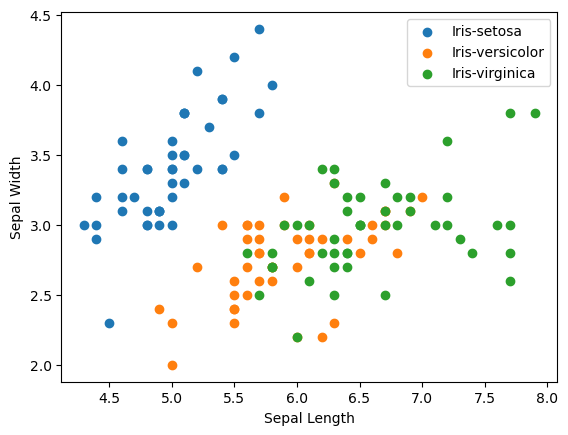

In [8]:
Classifications=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x=data[data['Classification']==Classifications[i]]
    plt.scatter(x['SL'],x['SW'],label=Classifications[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

In [9]:
data['Classification'].nunique()

3

In [10]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [11]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [12]:
for i in ['SL']:
    data[i]=data[i].fillna(value='0.0')

In [13]:
for i in ['PL']:
    data[i]=data[i].fillna(value='0.0')

In [14]:
for i in ['SW']:
    data[i]=data[i].fillna(value='0.0')

In [15]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    object 
 1   SW              150 non-null    object 
 2   PL              150 non-null    object 
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.0+ KB


# Find out which classification model gives the best result

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [17]:
le.classes_


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
data.duplicated().sum()

3

In [19]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,0.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['Classification'])
y=data['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [22]:
model=lr.fit(x_train,y_train)

In [23]:
y_predictions=model.predict(x_test)

In [24]:
y_predictions

array([1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1,
       1])

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
confusion_matrix(y_test,y_predictions)

array([[ 8,  0,  0],
       [ 0, 17,  3],
       [ 0,  1, 16]], dtype=int64)

In [27]:
print('Accurancy =',accuracy_score(y_test,y_predictions))

Accurancy = 0.9111111111111111


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
metric_k =[]
neighbors=np.arange(3,15)

In [30]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [31]:
metric_k

[0.8444444444444444,
 0.8444444444444444,
 0.8666666666666667,
 0.8444444444444444,
 0.9555555555555556,
 0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111]

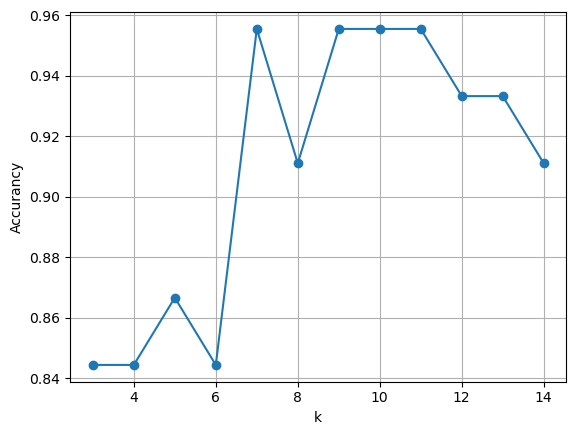

In [32]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accurancy')
plt.grid()

In [33]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [34]:
print('Accurancy =',accuracy_score(y_test,y_predictions))

Accurancy = 0.8666666666666667
